# Workshop 7, Friday, October 7, 2022

**The homework should be submitted on bCourses under the Assignments tab (both the .ipynb and .pdf files). Please label it by your student ID number (SIS ID)**

In this workshop, we will continue to practice numpy array operations, and we will also practice with data visualization. 

The first exercise is related to the problem 4 of HW03. This should also help with your homework. The second exercise is partly a tribute to Stuart Freedman and John Clauser, whose pioneering work on testing Bell's inequality was recognized by a Nobel Prize in Physics to John Clauser in 2022. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Exercise 1
In this exercise, we will continue to analyze the data sample of $Z \rightarrow \mu\mu$ events, which was shown in Monday's lecture and is also part of HW03. 

The specific objective of this exercise is to plot the $\phi$ distribution of the dimuon system and practice with basics of data visualization.
- You will create a distribtuion of the $\phi$ of the dimuon system, working on cosmetics (including labeling, binning, styles of entries, legend, etc.)
- You will make a `shape comparison`, where you normalize two distributions with differet normalizations to the same area so that you can compare their shapes.

### Background background
This markdown cell contains an excerpt from Problem 4 Homework 3

The csv file `Zmumu.csv` contains simulated data of proton proton collision events that produce Z bosons. These Z bosons, once produced, instantaneously decay into a pair of leptons. Leptons are detected and meausured by a collider detector. In this exercise, five properties of the lepton is measured: energy (E), the three spatial components of its momentum px, py, pz, and the electric charge of lepton (+1 meaning positively charged, -1 meaning negatively charged). In the csv label, the first line is a header indicating the meaning of entries. E1, px1, py1, pz1, and Q1, are the energy, px, py, pz, and charge of lepton1, respectively; similarly, E2, px2, py2, pz2, and Q2 are properties of lepton2. Each line in the csv file corresponds to a collision event. In each collision event, only one Z boson was produced.  


You will `reconstruct` the properties of the original Z boson using measured lepton properties. We will use the conservation of energy and momentum of the physical system. Since the two leptons are products of the Z boson decay, the energy of the physical system comprised of the two leptons should be the same the energy of the Z boson. The same can be said about the momenta of the Z boson and the di-lepton system. We have the following relations:

$Z \rightarrow l^{+}l^{-}$

$E_Z = E_1 + E_2$

$\vec{p_Z} = \vec{p_1} + \vec{p_2}$ where $\vec{p_1}$ and $\vec{p_2}$ are the momenta of the lepton 1 and lepton2, respectively. 

Energy and momentum have the following relation

$E^{2} = m^{2} + |\vec{p}|^2$

(here we use natural units https://en.wikipedia.org/wiki/Natural_units#Natural_units_(particle_and_atomic_physics) in practice, mass, energy, and momentum are treated as quantitites with the same dimension.) 


What these equations tell you is that you can use the measured energies and momenta of leptons to derive the original Z boson energy and momentum. Then, the Z boson mass can be calculated from its energy and momentum.

#### Useful relations

   - mass $m = \sqrt{E^2 - |\vec{p}|^2}$ . Note that $|\vec{p}|^2$ is simply $p_{x}^{2} + p_{y}^{2} + p_{z}^{2}$
   - transverse momentum $p_{T} = \sqrt{p_{x}^2 + p_{y}^{2}} $ . $p_{T}$ is the projection of the particle momentum to the x-y plane (in particle physics, known as the `transverse plane`). We'll use p_T for transverse momentum for simplicity.
   - the polar angle of the particle $\theta = arccos(p_z / |\vec{p}|) $ 
   - the azmuthal angle of the particle: 
       - $\phi = arccos(p_x/p_T)$ if $p_y > 0$
       - $\phi = 2\pi - arccos(p_x/p_T)$ if $p_y < 0$
   - the pseudorapidty of the particle $\eta = log_{e}(tan\frac{\theta}{2})$

**Also check out the sketch below**
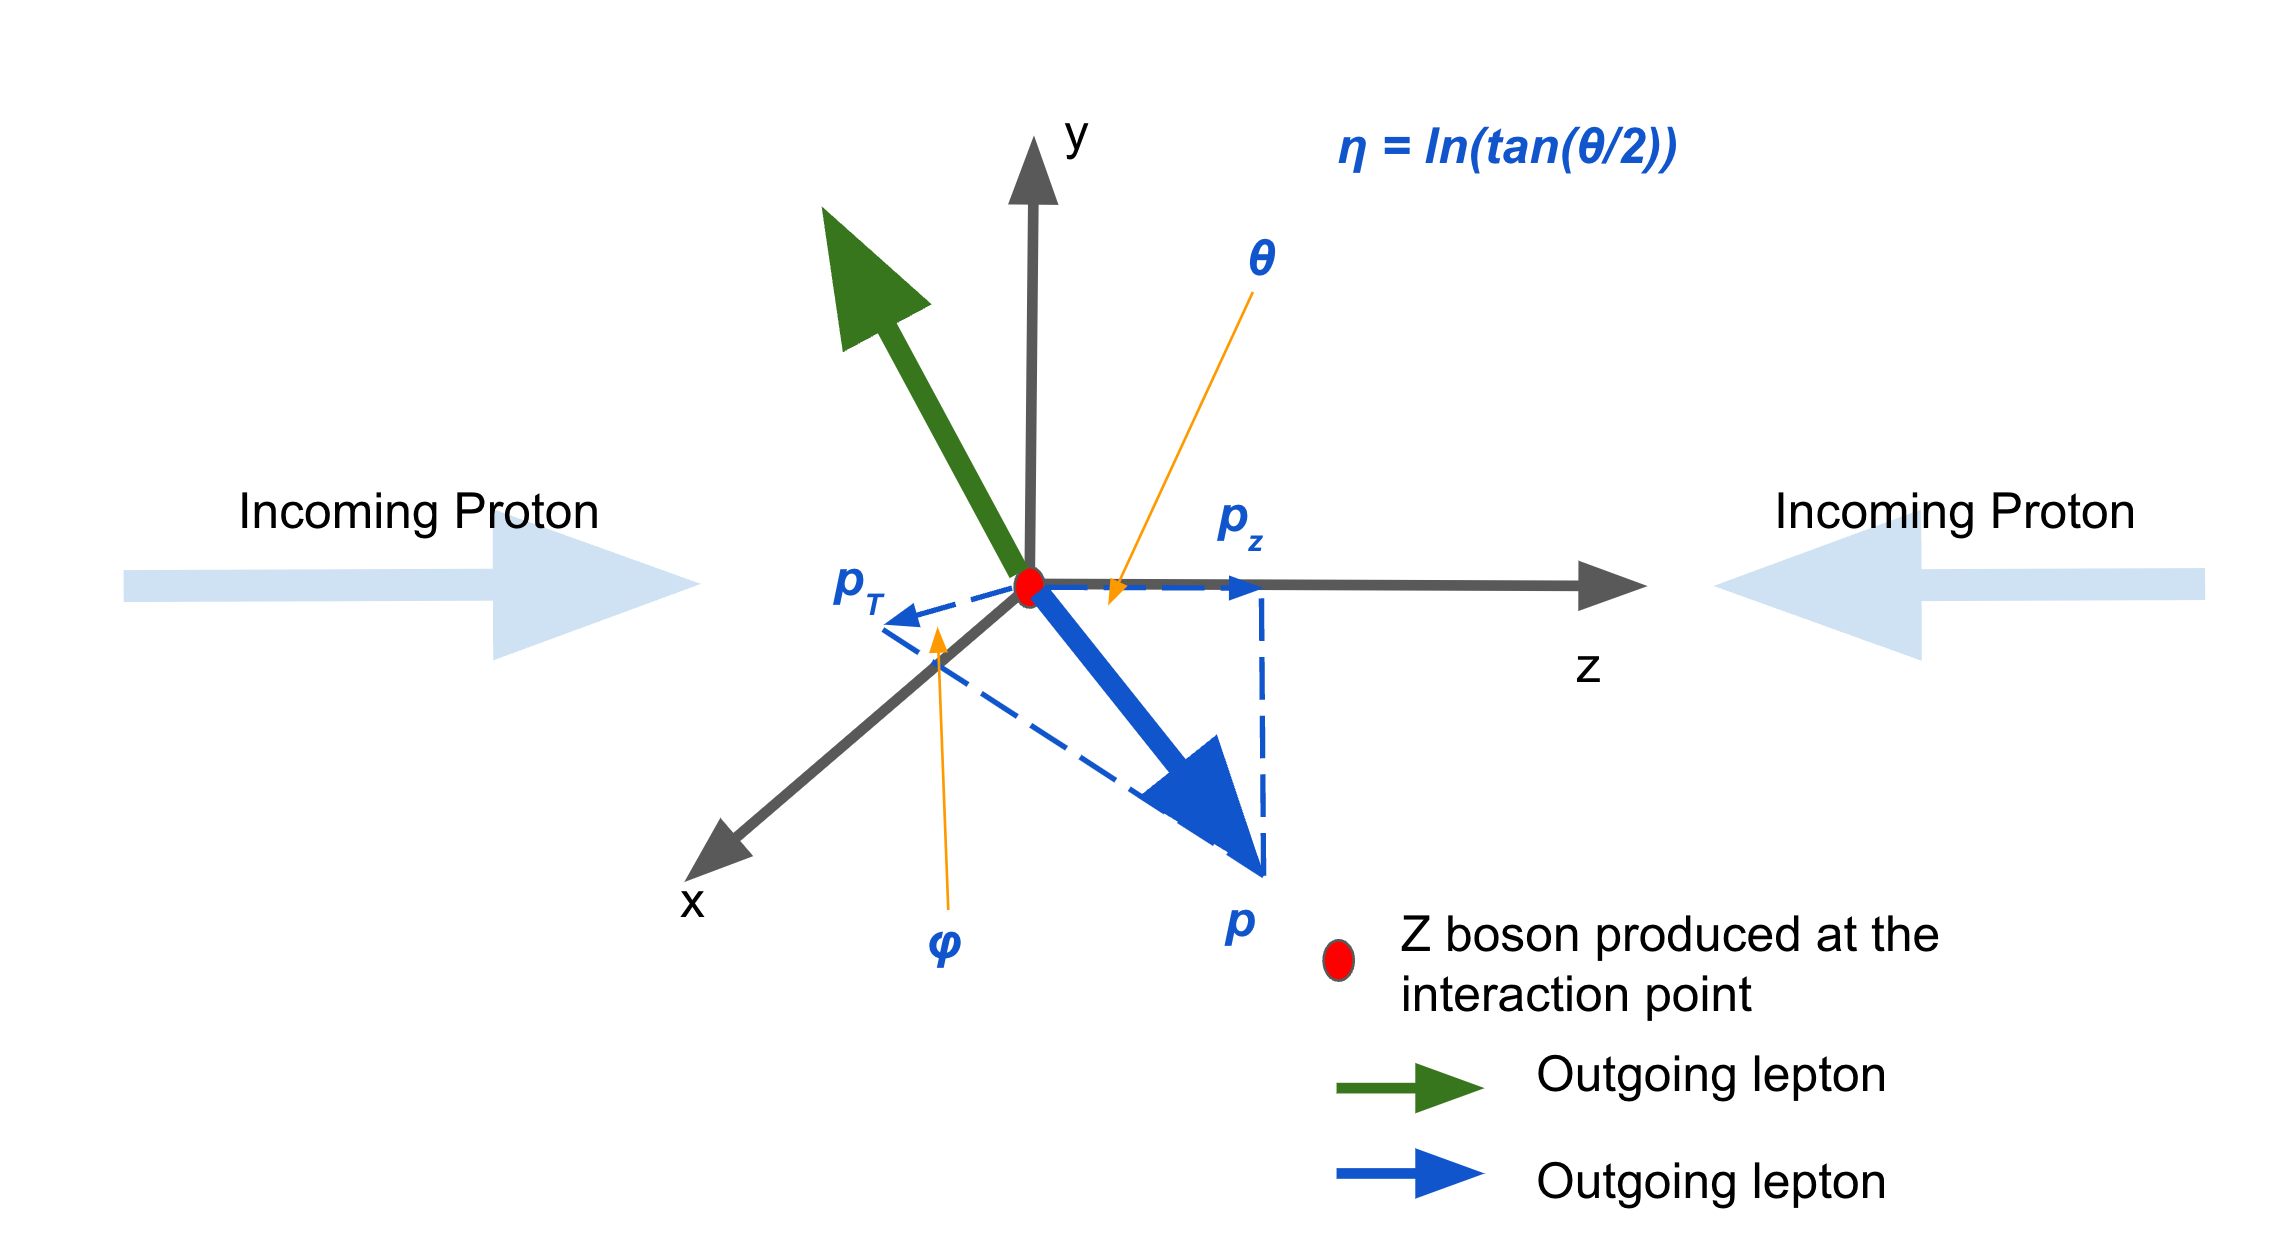

Note that in this exercise and the homework03, we use the terms "lepton" and "muon" interchangeably. In the Standard Model of particle physics, muons are a type of leptons.

###  Your coding development starts here

### Loading data
In the cell below, use `%cat` to print out the content of `Zmumu.csv`, examine the header (first line) of the file, and understand the meaning and ordering of the entries.

In [ ]:
# Use %cat to print out Zmumu.csv
# Check out the header of the file and understand what are these entries

Now, load data in the `Zmumu.csv` to a numpy array, named as data
- specify the delimiter 
- skip the first row of Zmumu.csv, which is the header
- do a printout of the numpy array and see the typical values and ranges of the entries

In [ ]:
# Your code loading the csv file and creating the numpy array -
# What methods from numpy can you use to load data from a csv file?


### Build the four momentum of the dimuon system
The numpy array `data` should have a shape of (2304,10), indicating that there are 2304 collision events of $Z \rightarrow \mu\mu$. The first five entries on the axis 1 are from the same muon, and the next five entries on the axis 1 are from the other muon. So we create two separate arrays for these muons.

In [136]:
# Pay attention to the indices
# muon 1 is done for you
muon1 = data[:,0:5]

# fix the line below
muon2 = data[   ]

Since the operation between two numpy arrays is also implemented element-wise, we can simply add the two muon numpy arrays together to get the numpy array representing the dimuon system. In the newly created array `dimuon`, the entries on the axis 1 are px, py, pz, E, and Q of the dimuon system.   

In [ ]:
dimuon = muon1 + muon2

# write codes to check out the shape, dimension, and size of 
# dimuon, muon1 and muon2



### Calculate the $\phi$ variable of dimuon system
Now, define the function that calculates the $\phi$ angle of a particle. You should have already defined it in your last workshop
 - recall 
     - $\phi = arccos(p_x/p_T), $ if $ p_y > 0 $ ; 
     - $ \phi = 2\pi - arccos(p_x/p_T),  $if$  p_y \leq 0 $
     - where $p_T = \sqrt{p_x^2 + p_y^2} $

Here I am giving you a partial answer. It should be straightforward for you to fix it. 

In [108]:
# What's wrong in the pt function? can you fix it?
# This implementation of the pT function was taken 
# from one of your WS06 submissions last week
def pt(px,py):
    np.sqrt(px**2+py**2)

    
# This definition of phi function would be numpy friendly.
# There is one line that needs to be fixed
# Make sure you are familiar with the np.where method,
# which we practiced last week
def phi(px, py):
    value = np.arccos(px/pt(px,py))
    value_2pi = 2*np.pi - np.arccos(px/pt(px,py))
    # can you fix the line below 
    value[        ] = value_2pi[         ]
    return value

Now calculate the phi values for the dimuon system
- it is always a good practice to perform a sanity check of the returning value of your function
    - print the first 100 entries in the axis 0 of dimuon_phi
    - print the shape, dimension, and size of dimuon_phi

In [ ]:
# complete this line
dimuon_phi = phi( )

# how would you print the first 100 entries in the axis 0 of dimuon_phi?
print(dimuon_phi[  ])

#print the shape, dimension, and size of dimuon_phi



### Plot the $\phi$ distribution of the dimuon system
- the x range should be (0, 2*pi) 
- set number of bins to 20
- label x and y axes
- Set histtype to step
- Set the color of the histogram to red
- Add a legend. The phi distribution should have a label of 'Dimuon system'

Your final product shoud look like this plot
<div>
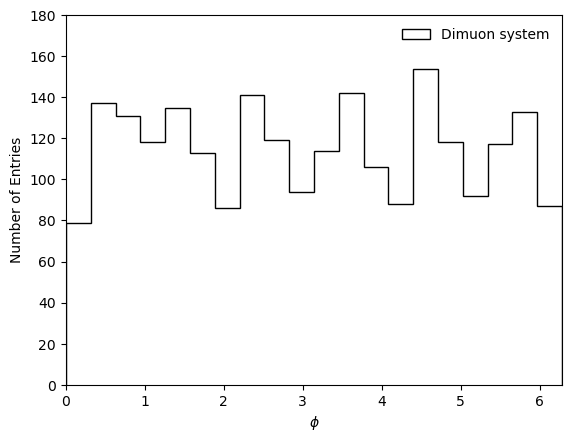
</div>




**A skeleton of this plotting code is available in the next cell. You just need to fill in the missing parts.**


In [ ]:
# Complete this line
plt.hist(dimuon_phi,bins=  ,range=, histtype= ,color= , label=)

# You also need to set the x axis range
plt.xlim(  )

# Adjust y axis range so that the legend and histogram do not overlap
plt.ylim(  )


# Number of entries or fraction of entries?
plt.ylabel()

# Type in greek letter phi
plt.xlabel()

# Fix the line below
plt.legend

### Plot the $\phi$ distributions from two sub sets of the sample

Now we divide the sample (the numpy array dimuon_phi) into two sub sets. The subset 1 has the first 300 entries from dimuon_phi, and the subset 2 has the rest of the dimuon_phi ()


In [ ]:
# Complete the lines below
subset1 = dimuon_phi[ ]
subset2 = dimuon_phi[ ]


Draw the phi distributions from both subsets on the same plot. 
- Use 20 bins and a range of (0,2*pi)
- set the line styles (solid, dashed, dotted, etc.) of the two histograms differently
- add a legend
- Use step as the histtype
- label x and y axes
- remove the boundary/frame line of the legend

**Your product should look like the plot attached below -**
<div>
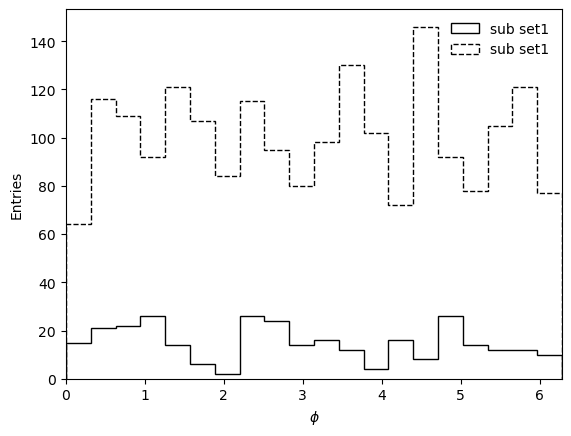
</div>


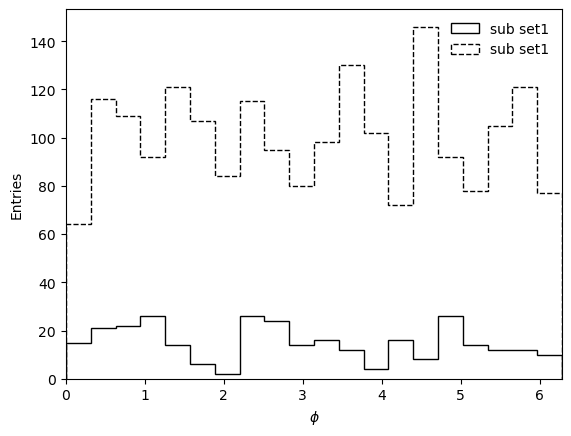

In [130]:
#Draw the phi distributions from both subsets on the same plot
plt.hist(subset1,bins=, range=(),histtype=,color='black',label=)
plt.hist(subset2,bins=, range=,histtype=,color='black',linestyle=,label=)

plt.xlim(0, )

plt.xlabel()

plt.ylabel()

# How do your turn off the outline of the legend?
plt.legend(frameon=)

In order to compare the shape of these two distributions, we normalize both distributions to 1, which means the integral of the histogram (or the area under the histogram) is 1. This can be done by turning on the density option in the hist method. You've seen this from the lecture on Monday.
- since we are plotting normalized distributions, the y title should be changed to "fraction of entries"
- adjust the y range so that the legend and histograms are not overlapping


In [ ]:
# develop your code here
# Hint - this cell should be largely the same as the previous cell


## Exercise 2: Replicating Figure 3 of Freedman and Clauser paper

On Tuesday, October 4, 2022, we woke up to the news that the 2022 Nobel Prize in Physics was awarded to three physicists, “for experiments with entangled photons, establishing the violation of Bell inequalities and pioneering quantum information science”. One of the experiments recognized by this year's Nobel Prize in Physics was conducted in 1971 by Berkeley physicists Stuart Freedman and John Clauser, and the latter won the Nobel Prize this year. Prof. Freedman taught at UC Berkeley and passed away in 2012. Their pioneering work was published by Phys. Rev. Letters (https://doi.org/10.1103/PhysRevLett.28.938) and it was also the Ph.D. project of Stuart Freedman, who at the time was a graduate student at our department. Check out this news article about Freedman and Clauser's experiment at Berkeley https://news.berkeley.edu/2022/10/04/physics-nobel-recognizes-berkeley-experiment-on-spooky-action-at-a-distance/

In this exercise, we will reproduce the most important figure in Freedman and Clauser's 1971 paper (often colloquially knonw as the "money plot"), with matplotlib. We will also pratice some numpy operation and making ratio and residual plots.


The plot shown below is the Figure 3 of Freedman and Clauser's paper (https://doi.org/10.1103/PhysRevLett.28.938). It shows the R($\phi$), the coincidence rate for two photon detection, as a function of the angle $\phi$ between the planes of photon linear polarization. While you are encouraged to read their paper for details of the experiment, here you do not have to know the underlying physics to complete this exercise.

<div>
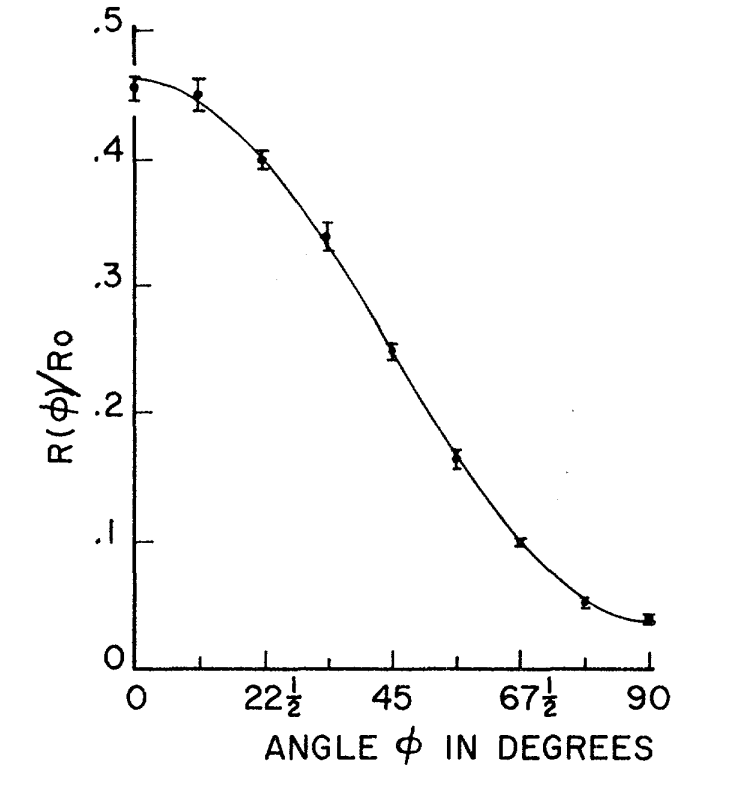
</div>

### Description of the exercise
I used an online data digitizer to obtain the data points and curve from Figure 3 of Freedman and Clauser's seminal paper (https://doi.org/10.1103/PhysRevLett.28.938). The quantum mechanics prediction is saved as a series of points in the file `QM prediction.csv`, and the measured data points are saved in `Updated Measured Data.csv`. The two cells below load data from these files and plot the measurements and prediction on the same figure. 

Your task is to use the code I developed to replcate the ATLAS $H \rightarrow \gamma\gamma$ mass plot as a reference, to reproduce the plot attached here. You can find my example code in the notebook of Lecture 5, released on October 3, 2022.

- specifically, you need to produce a plot with a ratio panel and a plot with a residual panel.

- **your plot should have the same axis labels, line and marker styles, legend, colors, text labels, lines, etc. as my examples shown below.**

- to get the prediction values at the nine angular points where measurements were made, you can load the data from `QM prediction at nine measured points.csv`. This would allow you to calculate the residual (measured data - prediction).

## The required output of the plot with a ratio panel
<div>
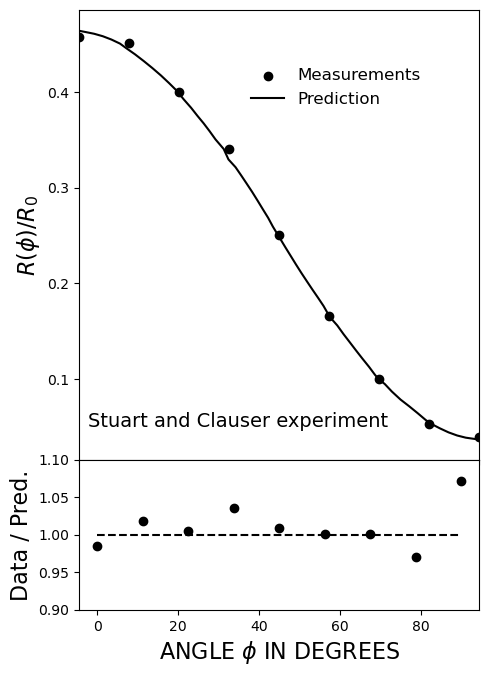
</div>



## The required output of the plot with a residual panel

<div>
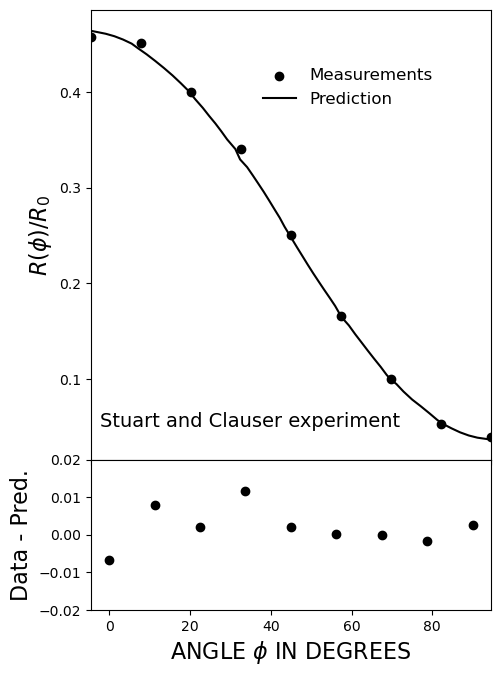
</div>


In [ ]:
# This file contains the measurements of R(phi)/R0 at nine different values in phi ( phi = np.linspace(0,90,9))
data=np.loadtxt('Updated Measured Data.csv', delimiter=',')

# This file contains a series of ponits of (phi, R(phi)/R0) with small step size in phi. 
# Use points from this file to create a continuous curve with plt.plot method
prediction_fine = np.loadtxt('QM prediction.csv', delimiter=',')

# This file contains a series of ponits of (phi, R(phi)/R0) at the nine phi values where measurements were made
# Use this file and the measured data file to create residual or ratio
prediction_coarse = np.loadtxt('QM prediction at nine measured points.csv', delimiter=',')

plt.scatter(data[:,0],data[:,1])
plt.plot(prediction_fine[:,0],prediction_fine[:,1])



### Your coding development starts here
#### Make the plot with a residual panel

In [ ]:
# calculate the residual.
# the input are the two numpy arrays defined above, data and prediction_coarse
# the returning argument should be an numpy array of shape (9,2). 
# The first entry of axis 1 is the phi angle where the measurements were made
# In other words, residual[:,0] should be the same as data[:,0] and prediction_coarse[:,1]
# The second entry of axis is the residual defined as (data - prediction)

def residual(x,y):

    return 

In [ ]:
# develop your plotting code here


#### Make the plot with a ratio panel

In [ ]:
# calculate the ratio.
# the input are the two numpy arrays defined above, data and prediction_coarse
# the returning argument should be an numpy array of shape (9,2). 
# The first entry of axis 1 is the phi angle where the measurements were made
# In other words, residual[:,0] should be the same as data[:,0] and prediction_coarse[:,1]
# The second entry of axis is the ratio defined as (data/prediction)

def ratio(x,y):
    
    return


In [ ]:
# develop your plotting code here


Congrats! You have completed the workshop!

